<a href="https://colab.research.google.com/github/gcc71/msds-686/blob/main/Deep_Learning__Hello_MNIST_Moore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A tutorial introduction into deep learning with Keras and Tensorflow.  We will use the MNIST dataset which is the 'Hello world' problem of deep learning

I always like to start my jupyter notebooks with this code because it fits the display window to my screen.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### This tutorial was adapted from Deep Learning with Python Chollet, F. (2021). Deep Learning with Python (2nd ed.). Greenwich, CT, USA: Manning Publications Co.

Start with some definitions.
Numerical data in an array are called [tensors](https://en.wikipedia.org/wiki/Tensor).

Scalars are 0-dimensional tensors (a single digit).

In [3]:
import numpy as np
x = np.array(12)
print('The value of x is', x)
print('The dimension of this tensor is', x.ndim) # 0 dimensions

The value of x is 12
The dimension of this tensor is 0


A 1-dimensional tensor is also called a vector

In [4]:
x = np.array([12, 1, 2, 3]) #create a vector
print('The value of x is', x)
print('The dimention of this tensor is', x.ndim) # 1 dimensions

The value of x is [12  1  2  3]
The dimention of this tensor is 1


A 2-dimensional tensor is also called a matrix

In [5]:
x = np.array([[12, 1, 2, 3],
              [5, 6, 7, 8,],
              [10, 11, 12, 12]])
print('The value of x is', x) # Print the 3 x 4 matrix
print('The dimension of this tensor is', x.ndim) # 2 dimensions

The value of x is [[12  1  2  3]
 [ 5  6  7  8]
 [10 11 12 12]]
The dimension of this tensor is 2


We can create n-dimensional tensors easily, although they become difficult to visualize.
This 3D tensor is like a cube of data.  

In [6]:
x = np.array([[[12, 1, 2, 3],
               [5, 6, 7, 8,],
               [10, 11, 12, 12]],
              [[2, 2, 2, 2,],
               [3,3,3,3],
               [4,4,4,4]],
              [[5,5,5,5],
               [6,6,6,6],
               [7,7,7,7]]])
print('The value of x is', x)
print('The dimension of this tensor is', x.ndim) # 3 dimensional array

The value of x is [[[12  1  2  3]
  [ 5  6  7  8]
  [10 11 12 12]]

 [[ 2  2  2  2]
  [ 3  3  3  3]
  [ 4  4  4  4]]

 [[ 5  5  5  5]
  [ 6  6  6  6]
  [ 7  7  7  7]]]
The dimension of this tensor is 3


#### Reshaping tensors is an important concept to understand.  We can reshape a tensor as long as it has the same number of elements as the initial tensor.

In [7]:
x = x.reshape(3*3*4,1)
print(x)
x = x.reshape(4, 3*3)
print(x)
x = x.reshape(2, 18)
print(x)

[[12]
 [ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [10]
 [11]
 [12]
 [12]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 7]
 [ 7]
 [ 7]
 [ 7]]
[[12  1  2  3  5  6  7  8 10]
 [11 12 12  2  2  2  2  3  3]
 [ 3  3  4  4  4  4  5  5  5]
 [ 5  6  6  6  6  7  7  7  7]]
[[12  1  2  3  5  6  7  8 10 11 12 12  2  2  2  2  3  3]
 [ 3  3  4  4  4  4  5  5  5  5  6  6  6  6  7  7  7  7]]


##### Tensors have three attributes:
- Number of axes (dimensions)
- Shape (length of each axis)
- Data type (typically we will use `float32`)

We can also manipulate tensors with TensorFlow

In [8]:
# Import Tensorflow as tf
import tensorflow as tf

In [9]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [10]:
# Create a Tensorflow variable
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.4444327],
       [-1.2642043],
       [ 0.7266409]], dtype=float32)>


In [11]:
# Once the variable is created it can be modified using assign
v2 = v.assign(tf.random.normal(shape=(3,1)))
print(v2)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[0.59436387],
       [0.3526739 ],
       [0.06494465]], dtype=float32)>


In [12]:
# Now we can perform some math operations on the tensors
np.dot(v, v2)

ValueError: ignored

In [13]:
# We get the above error because the shapes of v and v2 do not align properly for a dot product.
print(v.shape)
print(v2.shape)

# For a dot product to alight the column rows of X must match the rows of Y. (See Figure 2.5 in book)
# Therefore, we must transpose v2

(3, 1)
(3, 1)


In [14]:
v3 = np.transpose(v2)
print(v.shape)
print(v3.shape)

(3, 1)
(1, 3)


In [15]:
# Now the rows of v match the columns of v3 we can take the dot product
np.dot(v, v3)

array([[0.3532684 , 0.20961662, 0.03860075],
       [0.20961662, 0.12437887, 0.02290428],
       [0.03860075, 0.02290428, 0.00421781]], dtype=float32)

# Let's build our first neural net

Load the MNIST library which is part of [Keras](https://keras.io/datasets/).  MNIST stands for [Modified National Institute of Standards and Technology](https://en.wikipedia.org/wiki/MNIST_database). It is a collection of 60,000 training and 10,000 test images of the digits 0-9. We will build a deep learning nerual net model to classify the 10 digits. This is the 'Hello World' problem of deep learning.

In [16]:
from keras.datasets import mnist

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [18]:
train_images.shape #60,000 images that are 28 pixles by 28 pixels.

(60000, 28, 28)

In [19]:
train_images.ndim #3D tensor

3

In [20]:
print('The maximum value in the array is', train_images.max()) # The maximum value in the array is 255
print('The minimum value in the array is', train_images.min()) # The minimum value in the array is 0

The maximum value in the array is 255
The minimum value in the array is 0


In [21]:
# Get the shape, dimensions, max and min value of the test images
print('test image shape:', test_images.shape)
print('number of dimensions:', test_images.ndim)
print('maximum value', test_images.max())
print('minimum value:', test_images.min())

test image shape: (10000, 28, 28)
number of dimensions: 3
maximum value 255
minimum value: 0


In general, the first axis in a tensor is the samples, the second axis is height, the third axis is the width, and the fourth is color channels (3 for RGB data, and 1 for black and white). So image data will typically be a 4D tensor -- `[samples, height, width, channels]`, while the MNIST data is 3D because the color channel is black and white and can thus be ignored.
Video data will be a 5D tensor -- `[samples, frames, height, width, channels]`. By convention, time series data will be placed on the secod axis when present

Let's view one of the images.  We need to import matplotlib to view the digits

In [22]:
import matplotlib.pyplot as plt

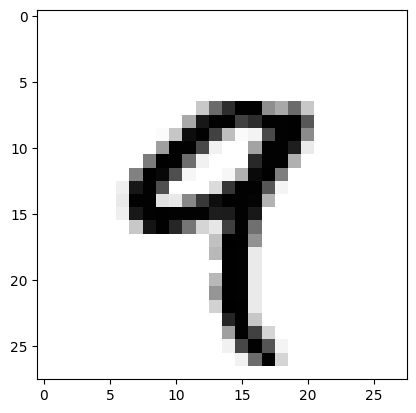

In [23]:
digit = train_images[4] # Select the fourth sample.
plt.imshow(digit, cmap=plt.cm.binary) # Show the sample.  cmap is the color map.  We will keep it black and white (binary)
plt.show()

The 4th train image looks like the number 9.  Lets make sure the label matches.

In [24]:
train_labels[4]

9

In [25]:
# Import models and layers from the keras library
from keras import models
from keras import layers

We will be working with sequential models and *dense layers*. More on what those mean later.  Another name for a dense layer is a *fully connected layer*.  The dense layer must be one-dimensional. Therefore, the input image matrix must be reshaped into a vector. There are 60,000 test images with a shape of 28 x 28. We will reshape each image into a vector of length 28 * 28 == 784.

We pick the `relu` activation function for our first layer and our output layer activation function is `softmax` because we have a multiclass classification problem.

In [26]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Now we compile the model.  We use the `adam` optimizer and choose `categorical_crossentropy` for the loss function because it is a multiclass classification problem. We will evaluate our model accuracy.

In [27]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Now the model is built and compiled we need to process the images for the model.  The images need to be reshaped into a vector of the same dimentions as the input shape above.  We also normalize the values of the images to be between 0 and 1.

In [28]:
scale_factor = train_images.max()
train_images =  train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/scale_factor

test_images =  test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/scale_factor

print(train_images.ndim)

2


In [29]:
print('train image shape:', train_images.shape)
print('number of dimensions:', train_images.ndim)
print('maximum value', train_images.max())
print('minimum value:', train_images.min())

train image shape: (60000, 784)
number of dimensions: 2
maximum value 1.0
minimum value: 0.0


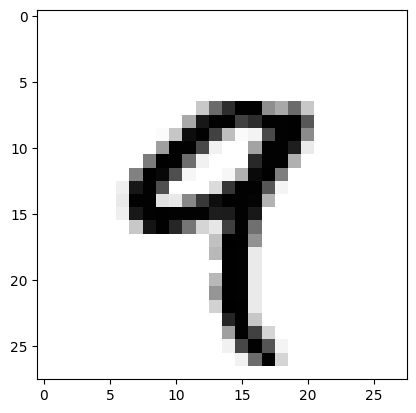

In [30]:
# We can always get our images back by reshaping to a matrix.
plt.imshow(train_images.reshape((60000,28,28))[4], cmap=plt.cm.binary)

In [31]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [32]:
# We need to convert the labels into catergorical values.
# We can check the train lables for the 4th value to ensure
# it is labeled as 9
print(train_labels[4])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [33]:
# Batch size is how many images to process at once.
# Epoch is how many times to repeat the analysis.
# Each epoch performs 500 gradient updates (60,000/120 = 500)
model.fit(train_images, train_labels, epochs = 5, batch_size = 120)

Epoch 1/5
500/500 [==============================] - 6s 3ms/step - loss: 0.2656 - accuracy: 0.9237
Epoch 2/5
500/500 [==============================] - 1s 3ms/step - loss: 0.1075 - accuracy: 0.9686
Epoch 3/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9793
Epoch 4/5
500/500 [==============================] - 2s 4ms/step - loss: 0.0490 - accuracy: 0.9859
Epoch 5/5
500/500 [==============================] - 2s 3ms/step - loss: 0.0358 - accuracy: 0.9897


In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9791
test_acc: 0.9790999889373779


# Your Turn.
# Below is your assignment
####  Build 3 different models with a dense layer with `relu` activation.  The output layer activation must be `softmax` since we have a multiclass problem.  You will compile the three different models with different optimizers.

In [35]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model1.add(layers.Dense(10, activation='softmax'))

model2 = models.Sequential()
model2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model2.add(layers.Dense(10, activation='softmax'))


model3 = models.Sequential()
model3.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model3.add(layers.Dense(10, activation='softmax'))

#### Compile your three models with three different optimizers. Page 89 - 90 of the tetbook list some different optimizers.  You can also find more optimizers and documentation here: https://keras.io/api/optimizers/
#### Use `categorical_crossentropy` for loss since this problem is a multiclass classification problem. The metric will be `accuracy`.

In [36]:
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.compile(optimizer = 'SGD',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.compile(optimizer='RMSprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

#### Fit the models with epochs = 5 and  batch_size = 150

In [37]:
print('Fitting model 1...')
model1.fit(train_images, train_labels, epochs=5, batch_size=120)
print('Fitting model 2...')
model2.fit(train_images, train_labels, epochs=5, batch_size=120)
print('Fitting model 3...')
model3.fit(train_images, train_labels, epochs=5, batch_size=120)


Fitting model 1...
Epoch 1/5
500/500 [==============================] - 2s 3ms/step - loss: 0.2607 - accuracy: 0.9263
Epoch 2/5
500/500 [==============================] - 1s 3ms/step - loss: 0.1043 - accuracy: 0.9701
Epoch 3/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9804
Epoch 4/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9864
Epoch 5/5
500/500 [==============================] - 2s 3ms/step - loss: 0.0346 - accuracy: 0.9898
Fitting model 2...
Epoch 1/5
500/500 [==============================] - 2s 3ms/step - loss: 1.0891 - accuracy: 0.7453
Epoch 2/5
500/500 [==============================] - 1s 3ms/step - loss: 0.5122 - accuracy: 0.8720
Epoch 3/5
500/500 [==============================] - 1s 3ms/step - loss: 0.4134 - accuracy: 0.8908
Epoch 4/5
500/500 [==============================] - 1s 3ms/step - loss: 0.3683 - accuracy: 0.8994
Epoch 5/5
500/500 [==============================] - 1s 3ms/step - loss

#### Test the accuracy of the model on the test images and test labels.

In [38]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('model1_test_acc:', test_acc)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('model2_test_acc:', test_acc)

test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('model3_test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9814
model1_test_acc: 0.9814000129699707
313/313 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.9157
model2_test_acc: 0.9157000184059143
313/313 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9807
model3_test_acc: 0.9807000160217285


# Which optimizer gave the highest accuracy? Write you answer below



model3 gave the best accuracy with RMSprop

### Using the optimizer that gave the highest accuracy compile 3 different models with 3 hidden layers and varying units in each hidden layer.  The first  layer is given to you.

In [62]:
h1_model = models.Sequential()
h1_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h1_model.add(layers.Dense(384, activation='softmax'))
h1_model.add(layers.Dense(62, activation='softmax'))
h1_model.add(layers.Dense(32, activation='softmax'))
h1_model.add(layers.Dense(10, activation='softmax'))

h2_model = models.Sequential()
h2_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h2_model.add(layers.Dense(62, activation='relu'))
h2_model.add(layers.Dense(32, activation='relu'))
h2_model.add(layers.Dense(10, activation='relu'))


h3_model = models.Sequential()
h3_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h3_model.add(layers.Dense(62, activation='softmax'))
h3_model.add(layers.Dense(32, activation='softmax'))
h3_model.add(layers.Dense(10, activation='softmax'))



In [63]:
h1_model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 512)               401920    
                                                                 
 dense_68 (Dense)            (None, 384)               196992    
                                                                 
 dense_69 (Dense)            (None, 62)                23870     
                                                                 
 dense_70 (Dense)            (None, 32)                2016      
                                                                 
 dense_71 (Dense)            (None, 10)                330       
                                                                 
Total params: 625,128
Trainable params: 625,128
Non-trainable params: 0
_________________________________________________________________


#### Complie the three models with the best optimizer from above.

In [64]:
h1_model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

h2_model.compile(optimizer='SGD',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

h3_model.compile(optimizer='RMSprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

#### Fit the models with epochs = 5 and  batch_size = 120

In [66]:
print('Fitting model h1...')
h1_model.fit(train_images, train_labels, epochs=5, batch_size=120)
print('Fitting model h2...')
h2_model.fit(train_images, train_labels, epochs=5, batch_size=120)
print('Fitting model h3...')
h3_model.fit(train_images, train_labels, epochs=5, batch_size=120)

Fitting model h1...
Epoch 1/5
500/500 [==============================] - 3s 6ms/step - loss: 1.7303 - accuracy: 0.2158
Epoch 2/5
500/500 [==============================] - 4s 8ms/step - loss: 1.7201 - accuracy: 0.2168
Epoch 3/5
500/500 [==============================] - 3s 7ms/step - loss: 1.7065 - accuracy: 0.2504
Epoch 4/5
500/500 [==============================] - 4s 7ms/step - loss: 1.6480 - accuracy: 0.3061
Epoch 5/5
500/500 [==============================] - 4s 7ms/step - loss: 1.5986 - accuracy: 0.3088
Fitting model h2...
Epoch 1/5
500/500 [==============================] - 3s 6ms/step - loss: 10.4956 - accuracy: 0.0904
Epoch 2/5
500/500 [==============================] - 2s 5ms/step - loss: 10.4500 - accuracy: 0.0904
Epoch 3/5
500/500 [==============================] - 2s 3ms/step - loss: 10.4168 - accuracy: 0.0904
Epoch 4/5
500/500 [==============================] - 2s 3ms/step - loss: 10.4003 - accuracy: 0.0904
Epoch 5/5
500/500 [==============================] - 2s 4ms/step 

#### Test the accuracy of the 3 models

In [67]:
test_loss, test_acc = h1_model.evaluate(test_images, test_labels)
print('h1_model_test_acc:', test_acc)

test_loss, test_acc = h2_model.evaluate(test_images, test_labels)
print('h2_model_test_acc:', test_acc)

test_loss, test_acc = h3_model.evaluate(test_images, test_labels)
print('h3_model_model_model_test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.6063 - accuracy: 0.3069
h1_model_test_acc: 0.3068999946117401
313/313 [==============================] - 1s 3ms/step - loss: 10.3720 - accuracy: 0.0892
h2_model_test_acc: 0.08919999748468399
313/313 [==============================] - 1s 3ms/step - loss: 1.2504 - accuracy: 0.4097
h3_model_model_model_test_acc: 0.4097000062465668


#### Which model gave the highest accuracy? Write you answer below.

model 3 was more accurate but I'm not sure why. I tried adding and subtracting layers and changing input sizes.